

# Book-Data-Visualization

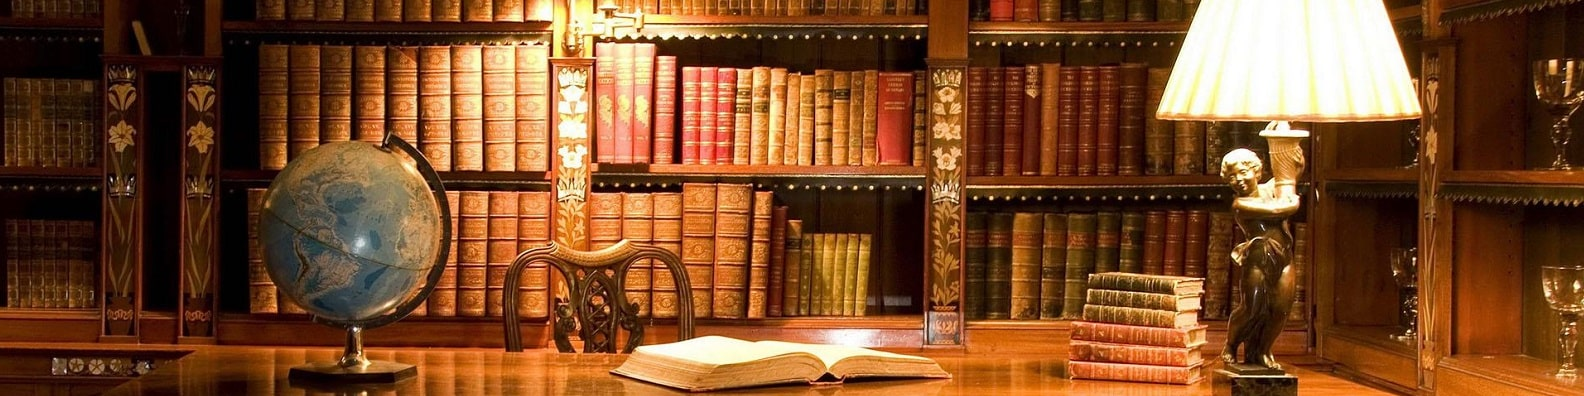

This dataset is gathered from Kaggle which is Book-Crossing: User Review/Ratings Contains 278,858 users (anonymized but with demographic information) providing 1,149,780 ratings (explicit / implicit) about 271,379 books.

## How to Run the Code and Save Your Work
Option 1: Running using free online resources (1-click, recommended): The easiest way to start executing the code is to click the Run button at the top of this page and select Run on Binder. This will set up a cloud-based Jupyter notebook server and allow you to modify/execute the code.

Option 2: Running on your computer locally: To run the code on your computer locally, you'll need to set up Python, download the notebook and install the required libraries. Click the Run button at the top of this page, select the Run Locally option, and follow the instructions.

Saving your work: You can save a snapshot of the assignment to your Jovian profile, so that you can access it later and continue your work. Keep saving your work by running jovian.commit from time to time.

In [1]:
!pip install jovian scikit-learn --upgrade --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.6/68.6 KB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [2]:
import jovian


In [3]:
jovian.commit(project='python-sklearn-assignment', privacy='secret')


[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


Let's begin by installing the required libraries:

In [4]:
!pip install numpy pandas matplotlib seaborn plotly opendatasets jovian --quiet


# Importing Libraries

In [5]:
!pip install pandas matplotlib seaborn jovian --quiet --upgrade

# Data Science libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

pd.options.display.max_columns = 200
pd.options.display.max_rows = 200

# Other utility libraries
import math
from math import nan
import json
import time

# Jovian library
import jovian

# Other modifications to our notebook
%matplotlib inline


#import plotly.graph_objects as go
import scipy.stats as sc
import datetime

#other libraries
import html
import os

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 41.1 MB/s eta 0:00:00


# Downloading Dataset

The dataset is available as a file at the following url:

In [6]:
!pip install opendatasets --upgrade --quiet

In [7]:
import opendatasets as od

In [8]:
od.version()

'0.1.22'

We'll use the urlretrieve function from the module urllib.request to dowload the dataset.

In [9]:
dataset_url = 'https://www.kaggle.com/datasets/ruchi798/bookcrossing-dataset'

In [10]:
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: krutikavinchu
Your Kaggle Key: ··········


100%|██████████| 76.1M/76.1M [00:03<00:00, 20.0MB/s]


Once the above command is executed, the dataset is downloaded and extracted to the the directory bookcrossing-dataset.



# View Dataset Files

In [11]:
import os

In [12]:
data_dir = './bookcrossing-dataset'

In [13]:
os.listdir(data_dir)

['Books Data with Category Language and Summary', 'Book reviews']

In [14]:
data_dir1 = './bookcrossing-dataset/Book reviews/Book reviews'

In [15]:
os.listdir(data_dir1)

['BX-Users.csv', 'BX_Books.csv', 'BX-Book-Ratings.csv']

In [16]:
data_dir2 = './bookcrossing-dataset/Books Data with Category Language and Summary'

In [17]:
os.listdir(data_dir2)

['Preprocessed_data.csv']

In [18]:
train_csv = data_dir1 + '/BX_Books.csv'

converting name of file BX_Books.csv to book_data_fixed.csv for better understanding.

In [19]:
import html
with open('./bookcrossing-dataset/Book reviews/Book reviews/BX_Books.csv', 'r', encoding='latin-1') as f, open('book_data_fixed.csv', 'w') as g:
    content = html.unescape(f.read())
    g.write(content)

Let's open some rows from book_data_fixed.csv using head() function

In [20]:
book_data = pd.read_csv('book_data_fixed.csv', skipinitialspace = True, sep=';', quotechar = '"', escapechar = '\\')


book_data.columns= book_data.columns.str.strip().str.lower().str.replace('-', '_')
book_data.head()

,isbn,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton & Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


same like above showing some of the rows from other two files that are BX_Users.csv & BX-Book-Ratings.csv

In [21]:
book_users_data = pd.read_csv('./bookcrossing-dataset/Book reviews/Book reviews/BX-Users.csv', sep= ';', encoding= 'latin-1')
book_users_data.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [22]:
book_rating_data = pd.read_csv('./bookcrossing-dataset/Book reviews/Book reviews/BX-Book-Ratings.csv', sep= ';', encoding= 'latin-1')

book_rating_data.columns= book_rating_data.columns.str.strip().str.lower().str.replace('-', '_')


book_rating_data.head()

,user_id,isbn,book_rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


finding out the rows and colums of each dataframe using shape attribute

In [23]:
book_data.shape

(271379, 8)

In [24]:
book_users_data.shape

(278858, 3)

In [25]:
book_rating_data.shape

(1149780, 3)

# Data Cleaning and Preparation

## User file data cleaning

In [26]:
split_location = book_users_data['Location'].str.split(',', expand=True)
book_users_data['City'] = split_location[0]
book_users_data['State'] = split_location[1]
book_users_data['Country'] = split_location[2]
book_users_data['State'] = book_users_data['State'].replace('n/a', None)

In [27]:
book_users_data

,User-ID,Location,Age,City,State,Country
0,1,"nyc, new york, usa",NaN,nyc,new york,usa
1,2,"stockton, california, usa",18.0,stockton,california,usa
2,3,"moscow, yukon territory, russia",NaN,moscow,yukon territory,russia
3,4,"porto, v.n.gaia, portugal",17.0,porto,v.n.gaia,portugal
4,5,"farnborough, hants, united kingdom",NaN,farnborough,hants,united kingdom
...,...,...,...,...,...,...
278853,278854,"portland, oregon, usa",NaN,portland,oregon,usa
278854,278855,"tacoma, washington, united kingdom",50.0,tacoma,washington,united kingdom
278855,278856,"brampton, ontario, canada",NaN,brampton,ontario,canada
278856,278857,"knoxville, tennessee, usa",NaN,knoxville,tennessee,usa


In [28]:
book_users_data['User-ID'].unique()

array([     1,      2,      3, ..., 278856, 278857, 278858])

So user_id's alright. Let's check out the age of the users.


In [29]:
book_users_data['Age'].unique()

array([ nan,  18.,  17.,  61.,  26.,  14.,  25.,  19.,  46.,  55.,  32.,
        24.,  20.,  34.,  23.,  51.,  31.,  21.,  44.,  30.,  57.,  43.,
        37.,  41.,  54.,  42.,  50.,  39.,  53.,  47.,  36.,  28.,  35.,
        13.,  58.,  49.,  38.,  45.,  62.,  63.,  27.,  33.,  29.,  66.,
        40.,  15.,  60.,   0.,  79.,  22.,  16.,  65.,  59.,  48.,  72.,
        56.,  67.,   1.,  80.,  52.,  69.,  71.,  73.,  78.,   9.,  64.,
       103., 104.,  12.,  74.,  75., 231.,   3.,  76.,  83.,  68., 119.,
        11.,  77.,   2.,  70.,  93.,   8.,   7.,   4.,  81., 114., 230.,
       239.,  10.,   5., 148., 151.,   6., 101., 201.,  96.,  84.,  82.,
        90., 123., 244., 133.,  91., 128.,  94.,  85., 141., 110.,  97.,
       219.,  86., 124.,  92., 175., 172., 209., 212., 237.,  87., 162.,
       100., 156., 136.,  95.,  89., 106.,  99., 108., 210.,  88., 199.,
       147., 168., 132., 159., 186., 152., 102., 116., 200., 115., 226.,
       137., 207., 229., 138., 109., 105., 228., 18

In [30]:
book_users_data['Age'].isnull().sum()


110762

In [31]:
book_users_data.loc[(book_users_data['Age'] > 90) | (book_users_data['Age'] < 5)] = np.nan
book_users_data['Age'].fillna((book_users_data['Age'].mean()), inplace=True)
book_users_data['Age']= book_users_data['Age'].astype('int64')
book_users_data['Age'].unique()

array([34, 18, 17, 61, 26, 14, 25, 19, 46, 55, 32, 24, 20, 23, 51, 31, 21,
       44, 30, 57, 43, 37, 41, 54, 42, 50, 39, 53, 47, 36, 28, 35, 13, 58,
       49, 38, 45, 62, 63, 27, 33, 29, 66, 40, 15, 60, 79, 22, 16, 65, 59,
       48, 72, 56, 67, 80, 52, 69, 71, 73, 78,  9, 64, 12, 74, 75, 76, 83,
       68, 11, 77, 70,  8,  7, 81, 10,  5,  6, 84, 82, 90, 85, 86, 87, 89,
       88])

In [32]:
book_users_data.columns= book_users_data.columns.str.strip().str.lower().str.replace('-', '_')

## Rating file data cleaning

We'll only take the ISBNs that also belongs to the main book_data set.


In [33]:
unique_ratings = book_rating_data[book_rating_data.isbn.isin(book_data.isbn)]


Ratings dataset should have ratings from users which exist in users dataset, unless new users are added to users dataset



In [34]:
book_rating_data = book_rating_data[book_rating_data.user_id.isin(book_users_data.user_id)]

In [35]:
unique_ratings['book_rating'].unique()


array([ 0,  5,  3,  6,  7,  9,  8, 10,  1,  4,  2])

In [36]:
print(book_rating_data.shape)
print(unique_ratings.shape)
print(book_data.shape)
print(book_users_data.shape)

(1142978, 3)
(1031175, 3)
(271379, 8)
(278858, 6)


# Merging DataFrames

command to merge 'book_rating_data' & 'book_users_data' data frames.

In [37]:
new_book_df= pd.merge(book_rating_data, book_data, on='isbn')
new_book_df.head()

,user_id,isbn,book_rating,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
3,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
4,23768,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...


now I am going to merge 'new_book_df' & 'book_data' data frames.

In [38]:
#new_book_df1= pd.merge(new_book_df, book_rating_data, on='ISBN')
#new_book_df1.head()

In [39]:
new_book_df.shape

(1026196, 10)

# Feature Engineering

Removing/Dropping some unwanted columns from Dataframe to reduce complexity of the data. As you can see we can not perform any kind of operaions on following 'Image-URL-S', 'Image-URL-M', 'Image-URL-L' columns so it's better to drop them first.

In [40]:
new_book_df

,user_id,isbn,book_rating,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
3,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
4,23768,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
...,...,...,...,...,...,...,...,...,...,...
1026191,276688,0517145553,0,Mostly Harmless,Douglas Adams,1995,Random House Value Pub,http://images.amazon.com/images/P/0517145553.0...,http://images.amazon.com/images/P/0517145553.0...,http://images.amazon.com/images/P/0517145553.0...
1026192,276688,1575660792,7,Gray Matter,Shirley Kennett,1996,Kensington Publishing Corporation,http://images.amazon.com/images/P/1575660792.0...,http://images.amazon.com/images/P/1575660792.0...,http://images.amazon.com/images/P/1575660792.0...
1026193,276690,0590907301,0,Triplet Trouble and the Class Trip (Triplet Tr...,Debbie Dadey,1997,Apple,http://images.amazon.com/images/P/0590907301.0...,http://images.amazon.com/images/P/0590907301.0...,http://images.amazon.com/images/P/0590907301.0...
1026194,276704,0679752714,0,A Desert of Pure Feeling (Vintage Contemporaries),Judith Freeman,1997,Vintage Books USA,http://images.amazon.com/images/P/0679752714.0...,http://images.amazon.com/images/P/0679752714.0...,http://images.amazon.com/images/P/0679752714.0...


In [41]:
new_book_df.drop(['image_url_s', 'image_url_m', 'image_url_l'], axis= 1, inplace= True)

In [42]:
new_book_df

,user_id,isbn,book_rating,book_title,book_author,year_of_publication,publisher
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
3,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
4,23768,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
...,...,...,...,...,...,...,...
1026191,276688,0517145553,0,Mostly Harmless,Douglas Adams,1995,Random House Value Pub
1026192,276688,1575660792,7,Gray Matter,Shirley Kennett,1996,Kensington Publishing Corporation
1026193,276690,0590907301,0,Triplet Trouble and the Class Trip (Triplet Tr...,Debbie Dadey,1997,Apple
1026194,276704,0679752714,0,A Desert of Pure Feeling (Vintage Contemporaries),Judith Freeman,1997,Vintage Books USA


# Data Preprocessing 

using describe() function we are able to see all mathematical parameters releted to our books dataset.

In [43]:
new_book_df.describe()

,user_id,book_rating,year_of_publication
count,1.026196e+06,1.026196e+06,1.026196e+06
mean,1.405453e+05,2.840243e+00,1.968326e+03
std,8.049216e+04,3.854705e+00,2.305459e+02
min,2.000000e+00,0.000000e+00,0.000000e+00
25%,7.040100e+04,0.000000e+00,1.992000e+03
50%,1.410680e+05,0.000000e+00,1.997000e+03
75%,2.113530e+05,7.000000e+00,2.001000e+03
max,2.788540e+05,1.000000e+01,2.050000e+03


understanding data types of the data set using info() function in python

In [44]:
new_book_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1026196 entries, 0 to 1026195
Data columns (total 7 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   user_id              1026196 non-null  int64 
 1   isbn                 1026196 non-null  object
 2   book_rating          1026196 non-null  int64 
 3   book_title           1026196 non-null  object
 4   book_author          1026195 non-null  object
 5   year_of_publication  1026196 non-null  int64 
 6   publisher            1026194 non-null  object
dtypes: int64(3), object(4)
memory usage: 62.6+ MB


listing all columns from dataframe new_book_df1.

In [45]:
new_book_df.columns


Index(['user_id', 'isbn', 'book_rating', 'book_title', 'book_author',
       'year_of_publication', 'publisher'],
      dtype='object')

In [46]:
new_book_df.columns= new_book_df.columns.str.strip().str.lower().str.replace('-', '_')

#rating_data.columns= rating_data.columns.str.strip().str.lower().str.replace('-', '_')
new_book_df


,user_id,isbn,book_rating,book_title,book_author,year_of_publication,publisher
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
3,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
4,23768,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
...,...,...,...,...,...,...,...
1026191,276688,0517145553,0,Mostly Harmless,Douglas Adams,1995,Random House Value Pub
1026192,276688,1575660792,7,Gray Matter,Shirley Kennett,1996,Kensington Publishing Corporation
1026193,276690,0590907301,0,Triplet Trouble and the Class Trip (Triplet Tr...,Debbie Dadey,1997,Apple
1026194,276704,0679752714,0,A Desert of Pure Feeling (Vintage Contemporaries),Judith Freeman,1997,Vintage Books USA


## Handling Null Values

In [47]:
new_book_df.isnull()

,user_id,isbn,book_rating,book_title,book_author,year_of_publication,publisher
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1026191,False,False,False,False,False,False,False
1026192,False,False,False,False,False,False,False
1026193,False,False,False,False,False,False,False
1026194,False,False,False,False,False,False,False


In [48]:
new_book_df.isnull().sum()

user_id                0
isbn                   0
book_rating            0
book_title             0
book_author            1
year_of_publication    0
publisher              2
dtype: int64

In [49]:
new_book_df.user_id.value_counts()

11676     11144
198711     6456
153662     5814
98391      5779
35859      5646
          ...  
20685         1
145268        1
42332         1
4002          1
276660        1
Name: user_id, Length: 91700, dtype: int64

Fixing the missing value problem in 'book_author' column.

In [50]:
new_book_df.loc[(new_book_df['book_author'].isnull()),: ]

,user_id,isbn,book_rating,book_title,book_author,year_of_publication,publisher
858998,98647,9627982032,8,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing


In [51]:
new_book_df.loc[(new_book_df['isbn'] == '9627982032'),'book_author'] = 'other'
new_book_df.loc[(new_book_df['book_author'].isnull()),: ]

,user_id,isbn,book_rating,book_title,book_author,year_of_publication,publisher


Fixing the null value problem in year_of_publication column

Look at the unique years to realize the time period as this dataset was created in 2004.


In [52]:
new_book_df['year_of_publication'].unique()

array([2002, 2001, 1996, 1999, 1998, 1994, 1995, 2003, 1997, 2024, 1992,
       1983, 2000,    0, 1989, 1991, 1993, 1976, 1990, 1982, 1988, 1981,
       1986, 1987, 1980, 2004, 1984, 1985, 1979, 1974, 1977, 1965, 1972,
       1978, 1962, 1957, 1958, 1960, 1963, 1969, 1970, 1975, 1959, 1968,
       1971, 1973, 1950, 1964, 1955, 1953, 1966, 1930, 1961, 1952, 1940,
       1954, 1967, 1911, 1946, 1941, 1920, 1956, 1942, 1951, 1948, 2005,
       1943, 1937, 1923, 1945, 1947, 1936, 1925, 1927, 2030, 2011, 2020,
       1939, 1926, 1938, 1904, 1949, 1932, 1929, 1944, 1933, 1922, 1897,
       2050, 1902, 1924, 1921, 1900, 2038, 2010, 1928, 2006, 1901, 2026,
       2021, 1931, 1378, 1908, 1909, 2012, 2008, 1935, 1376, 2037, 1906,
       1806, 1917, 1919, 1914, 1934, 1910])

In [53]:
new_book_df.loc[(new_book_df['publisher'].isnull()),'publisher'] = 'no mention'
print(new_book_df['publisher'].isnull().sum())


0


#**Exploratory Analysis and Visualization** 


Let's explore the data by visualizing the distribution of values in some columns of the dataset, and the relationships between "charges" and other columns.

We'll use libraries Matplotlib, Seaborn and Plotly for visualization. Follow these tutorials to learn how to use these libraries:



The following settings will improve the default style and font sizes for our charts.



In [54]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (15, 8)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [55]:
new_book_df.head()

,user_id,isbn,book_rating,book_title,book_author,year_of_publication,publisher
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
3,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
4,23768,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books


In [56]:
new_book_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1026196 entries, 0 to 1026195
Data columns (total 7 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   user_id              1026196 non-null  int64 
 1   isbn                 1026196 non-null  object
 2   book_rating          1026196 non-null  int64 
 3   book_title           1026196 non-null  object
 4   book_author          1026196 non-null  object
 5   year_of_publication  1026196 non-null  int64 
 6   publisher            1026196 non-null  object
dtypes: int64(3), object(4)
memory usage: 62.6+ MB


## User ID

In [57]:
book_users_data

,user_id,location,age,city,state,country
0,1.0,"nyc, new york, usa",34,nyc,new york,usa
1,2.0,"stockton, california, usa",18,stockton,california,usa
2,3.0,"moscow, yukon territory, russia",34,moscow,yukon territory,russia
3,4.0,"porto, v.n.gaia, portugal",17,porto,v.n.gaia,portugal
4,5.0,"farnborough, hants, united kingdom",34,farnborough,hants,united kingdom
...,...,...,...,...,...,...
278853,278854.0,"portland, oregon, usa",34,portland,oregon,usa
278854,278855.0,"tacoma, washington, united kingdom",50,tacoma,washington,united kingdom
278855,278856.0,"brampton, ontario, canada",34,brampton,ontario,canada
278856,278857.0,"knoxville, tennessee, usa",34,knoxville,tennessee,usa


In [58]:
top_countries = book_users_data.country.value_counts().head(15)
top_countries

 usa               138714
 canada             21492
 united kingdom     18176
 germany            16922
 spain              13011
 australia          11631
 italy              11187
                     4575
 france              3422
 portugal            3276
 new zealand         3051
 netherlands         3000
 switzerland         1725
 brazil              1654
 china               1456
Name: country, dtype: int64

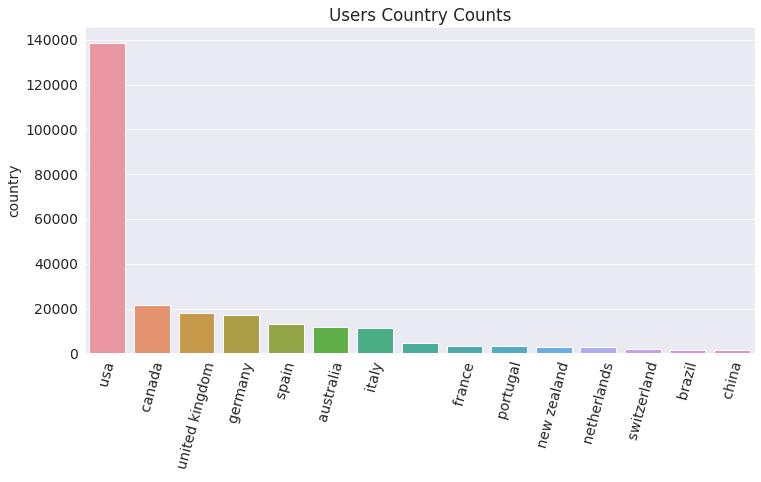

In [59]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title("Users Country Counts")
sns.barplot(x=top_countries.index, y=top_countries);


As you can see most active country users are from USA and least interested coutry is chaina.

## Top Rated Books & Ratings.

In [60]:
top_rated = new_book_df.sort_values('book_rating', ascending=False)
tf_top_rated = top_rated[:25]
fig = px.bar(tf_top_rated, x="book_rating", y="book_title", title='Top Rated Books and Their Ratings',
             orientation='h', color='book_title', width=1200, height=500)
fig.show()

## Publication Year

In [61]:
publicaion_df = new_book_df.year_of_publication.value_counts().head(15)
publicaion_df

2002    91344
2001    79430
1999    74818
2003    72144
2000    71949
1998    63899
1997    59091
1996    58576
1995    53847
1994    46232
1993    38032
1992    35039
1991    32572
1990    30413
2004    25847
Name: year_of_publication, dtype: int64

<ipython-input-62-6ddbcee29035>:1: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




<Axes: ylabel='Density'>

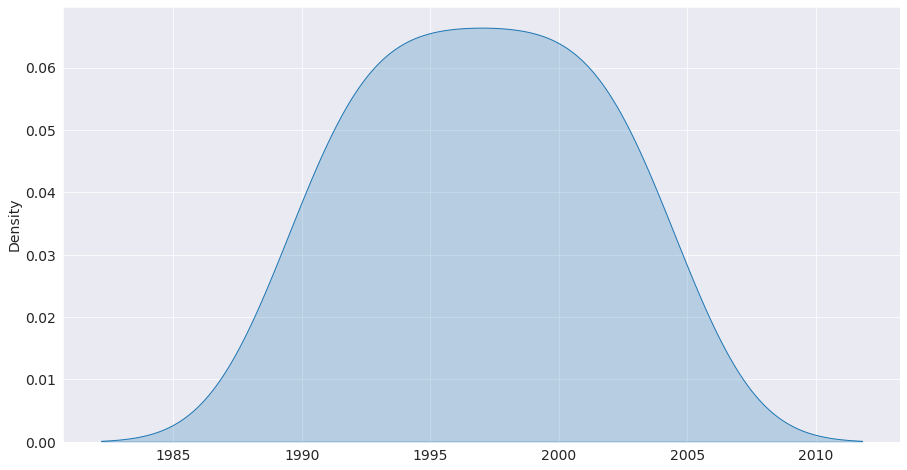

In [62]:
sns.kdeplot(publicaion_df.index, shade=True)


In above kdeplot, it is visible that most of the publication of books are happened between 1995 & 2000.

## Author

In [63]:
author_counts = new_book_df.book_author.value_counts().head(10)
author_counts

Stephen King          10009
Nora Roberts           8404
John Grisham           5991
James Patterson        5818
Mary Higgins Clark     4751
Dean R. Koontz         4300
Tom Clancy             4017
Danielle Steel         3704
Sue Grafton            3450
Janet Evanovich        3326
Name: book_author, dtype: int64

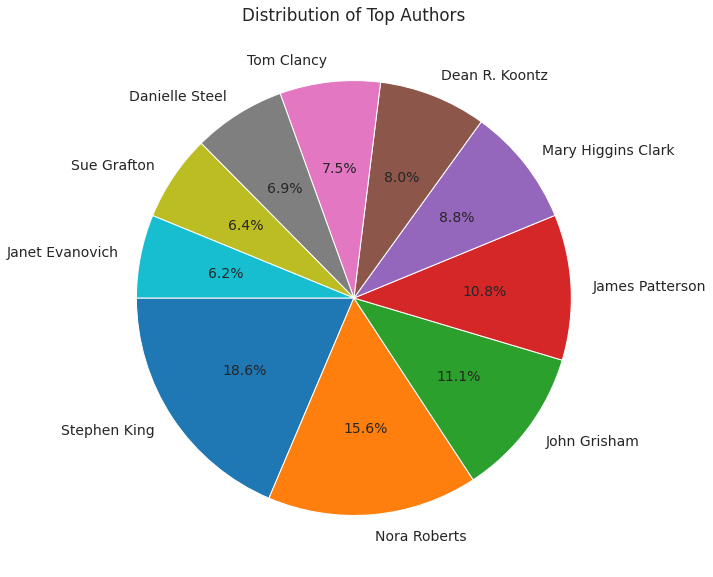

In [64]:
plt.figure(figsize=(12,10))
plt.title('Distribution of Top Authors')
plt.pie(author_counts, labels=author_counts.index, autopct='%1.1f%%', startangle=180);

Now we know that 'Stephen King' is one of the most popular book author by going through the above pie char visualization.

## Publisher

In [65]:
publisher_df = new_book_df.publisher.value_counts().head(20)
publisher_df

Ballantine Books            34569
Pocket                      31873
Berkley Publishing Group    28484
Warner Books                25391
Harlequin                   25008
Bantam Books                23499
Bantam                      19925
Signet Book                 19068
Avon                        17288
Penguin Books               16944
Jove Books                  15118
Silhouette                  14173
Dell                        13863
Scholastic                  13612
Perennial                   13402
Fawcett Books               12846
Dell Publishing Company     12683
HarperTorch                 12025
Vintage Books USA           11374
Simon & Schuster            10243
Name: publisher, dtype: int64

Text(0.5, 1.0, 'Distribution of Publication Year and Book Rating')

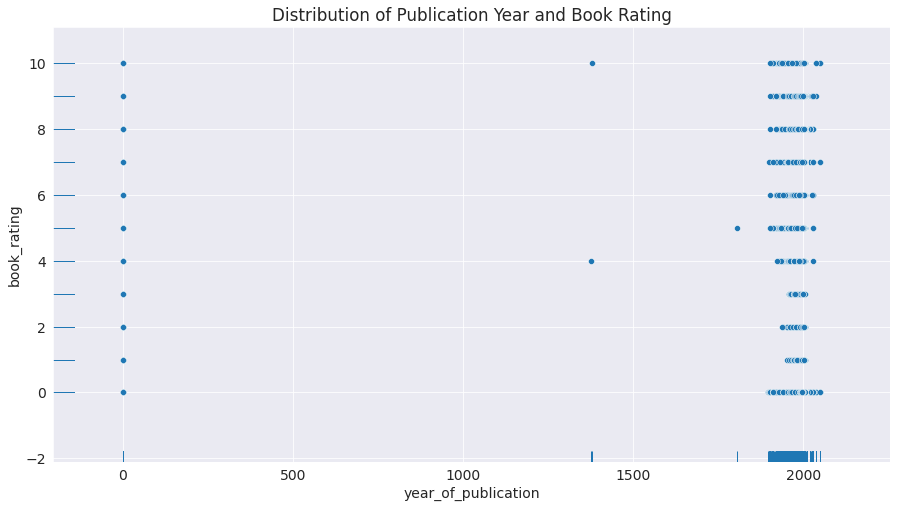

In [66]:
sns.scatterplot(data=new_book_df, x="year_of_publication", y="book_rating")
sns.rugplot(data=new_book_df, x="year_of_publication", y="book_rating")
plt.title('Distribution of Publication Year and Book Rating')

## Age

In [67]:
fig = px.histogram(book_users_data, 
                   x='age', 
                   marginal='box', 
                   nbins=85, 
                   title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

looking above I understand that people around age 35 are more active.

In [68]:
book_users_data.age.describe()

count    278858.000000
mean         34.432926
std          10.512758
min           5.000000
25%          29.000000
50%          34.000000
75%          35.000000
max          90.000000
Name: age, dtype: float64

Age is a float column. The minimum age in the dataset is 5 and the maximum age is 90. Thus, we can visualize the distribution of age using a histogram with 85 bins (one for each year) and a box plot. 

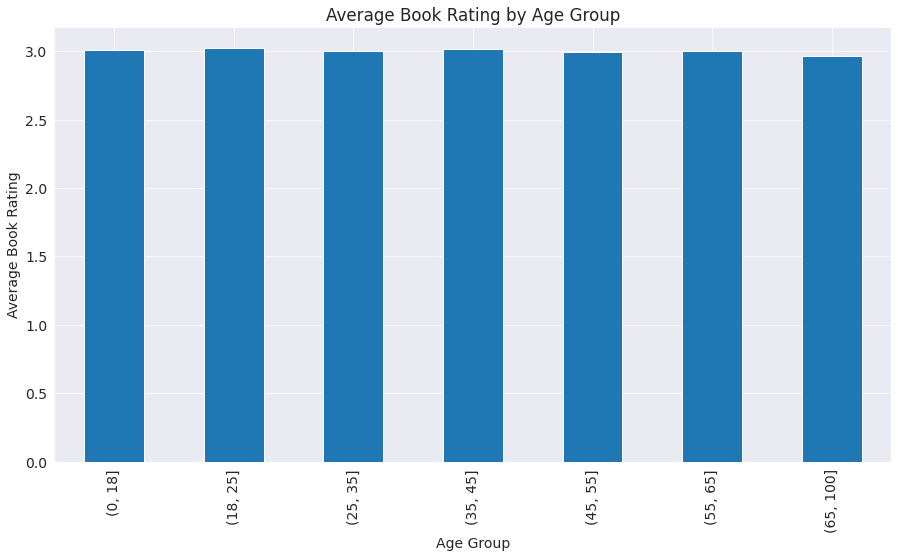

In [69]:


# Distribution of book ratings by age group
age_groups = pd.cut(book_users_data['age'], bins=[0, 18, 25, 35, 45, 55, 65, 100])
age_group_ratings = new_book_df.groupby(age_groups)['book_rating'].mean()
age_group_ratings.plot(kind='bar')
plt.xlabel('Age Group')
plt.ylabel('Average Book Rating')
plt.title('Average Book Rating by Age Group')
plt.show()



##Book_Rating

In [70]:
new_book_df.book_rating.count()

1026196

In [71]:
new_book_df.book_rating.describe()

count    1.026196e+06
mean     2.840243e+00
std      3.854705e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      7.000000e+00
max      1.000000e+01
Name: book_rating, dtype: float64

Book_Rating is a numeric column. We'll use plotly to make the chart interactive, but you can create similar charts using Seaborn.

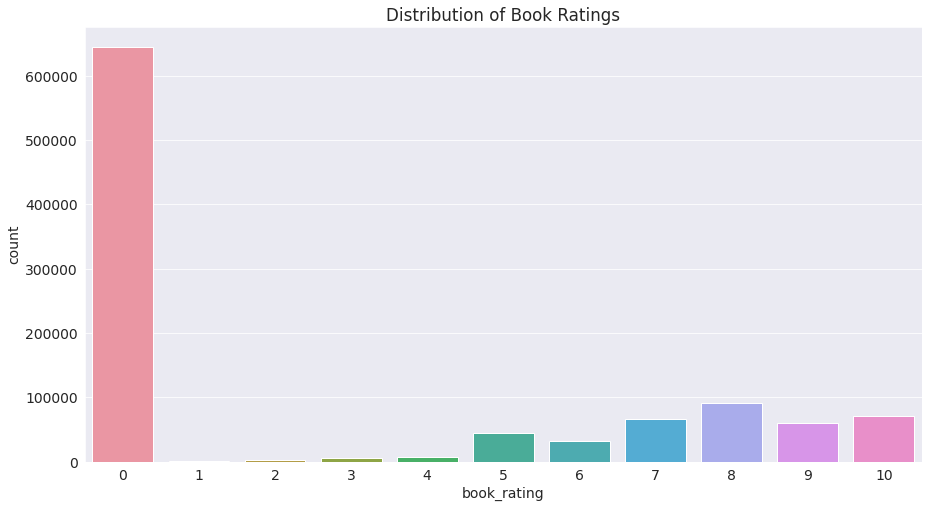

In [72]:
sns.set_style('darkgrid')
plt.title("Distribution of Book Ratings")

sns.countplot(data= new_book_df , x='book_rating')
plt.show()


This histogram shows users have rated 0 the most, which can mean they haven't rated bokks at all. We have to separate the explicit ratings represented by 1–10 and implicit ratings represented by 0.

In [73]:
ratings_explicit= unique_ratings[unique_ratings['book_rating'] != 0]
ratings_implicit= unique_ratings[unique_ratings['book_rating'] == 0]

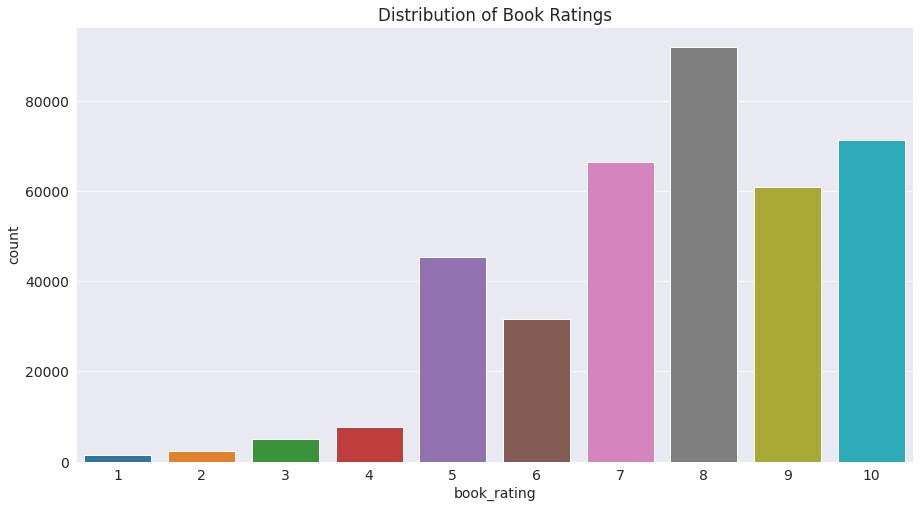

In [74]:
sns.set_style('darkgrid')
plt.title("Distribution of Book Ratings")
sns.countplot(data= ratings_explicit , x='book_rating')
plt.show()

now we are able to understand that 8 is highest number of rating is given to the books by users.

# ML 

merging book_users_data & new_book_df on column 'user_id'.

In [77]:
merge_df= pd.merge(new_book_df, book_users_data, on='user_id')
merge_df

,user_id,isbn,book_rating,book_title,book_author,year_of_publication,publisher,location,age,city,state,country
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,"tyler, texas, usa",34,tyler,texas,usa
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,"cincinnati, ohio, usa",23,cincinnati,ohio,usa
2,2313,0812533550,9,Ender's Game (Ender Wiggins Saga (Paperback)),Orson Scott Card,1986,Tor Books,"cincinnati, ohio, usa",23,cincinnati,ohio,usa
3,2313,0679745580,8,In Cold Blood (Vintage International),TRUMAN CAPOTE,1994,Vintage,"cincinnati, ohio, usa",23,cincinnati,ohio,usa
4,2313,0060173289,9,Divine Secrets of the Ya-Ya Sisterhood : A Novel,Rebecca Wells,1996,HarperCollins,"cincinnati, ohio, usa",23,cincinnati,ohio,usa
...,...,...,...,...,...,...,...,...,...,...,...,...
1026191,276442,2862749796,7,Le Huit,Katherine Neville,2002,Le Cherche Midi,"genève, genève, switzerland",62,genève,genève,switzerland
1026192,276618,3788097000,5,Ludwig Marum: Briefe aus dem Konzentrationslag...,Ludwig Marum,1984,C.F. MÃ¼ller,"stuttgart, \n/a\""., germany""",34,stuttgart,"\n/a\"".","germany"""
1026193,276647,0553571001,0,Christmas With Anne and Other Holiday Stories:...,L. M. Montgomery,2001,Starfire,"arlington heights, illinois, usa",13,arlington heights,illinois,usa
1026194,276647,0689822294,10,Heaven (Coretta Scott King Author Award Winner),Angela Johnson,1998,Simon & Schuster Children's Publishing,"arlington heights, illinois, usa",13,arlington heights,illinois,usa


In [76]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1026196 entries, 0 to 1026195
Data columns (total 12 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   user_id              1026196 non-null  int64 
 1   isbn                 1026196 non-null  object
 2   book_rating          1026196 non-null  int64 
 3   book_title           1026196 non-null  object
 4   book_author          1026196 non-null  object
 5   year_of_publication  1026196 non-null  int64 
 6   publisher            1026196 non-null  object
 7   location             1026196 non-null  object
 8   age                  1026196 non-null  int64 
 9   city                 1026196 non-null  object
 10  state                1026196 non-null  object
 11  country              1026196 non-null  object
dtypes: int64(4), object(8)
memory usage: 101.8+ MB


make a copy of real dataset

In [80]:
merge_df.rename(columns = {'age':'user_age',
                              'city':'user_city',
                              'state':'user_state',
                              'country':'user_country',
                              'location':'user_location'}, inplace = True)
merge_df

,user_id,isbn,book_rating,book_title,book_author,year_of_publication,publisher,user_location,user_age,user_city,user_state,user_country
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,"tyler, texas, usa",34,tyler,texas,usa
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,"cincinnati, ohio, usa",23,cincinnati,ohio,usa
2,2313,0812533550,9,Ender's Game (Ender Wiggins Saga (Paperback)),Orson Scott Card,1986,Tor Books,"cincinnati, ohio, usa",23,cincinnati,ohio,usa
3,2313,0679745580,8,In Cold Blood (Vintage International),TRUMAN CAPOTE,1994,Vintage,"cincinnati, ohio, usa",23,cincinnati,ohio,usa
4,2313,0060173289,9,Divine Secrets of the Ya-Ya Sisterhood : A Novel,Rebecca Wells,1996,HarperCollins,"cincinnati, ohio, usa",23,cincinnati,ohio,usa
...,...,...,...,...,...,...,...,...,...,...,...,...
1026191,276442,2862749796,7,Le Huit,Katherine Neville,2002,Le Cherche Midi,"genève, genève, switzerland",62,genève,genève,switzerland
1026192,276618,3788097000,5,Ludwig Marum: Briefe aus dem Konzentrationslag...,Ludwig Marum,1984,C.F. MÃ¼ller,"stuttgart, \n/a\""., germany""",34,stuttgart,"\n/a\"".","germany"""
1026193,276647,0553571001,0,Christmas With Anne and Other Holiday Stories:...,L. M. Montgomery,2001,Starfire,"arlington heights, illinois, usa",13,arlington heights,illinois,usa
1026194,276647,0689822294,10,Heaven (Coretta Scott King Author Award Winner),Angela Johnson,1998,Simon & Schuster Children's Publishing,"arlington heights, illinois, usa",13,arlington heights,illinois,usa


# Jovian

In [ ]:
import jovian
jovian.commit(project='Machine Learning Project', privacy='secret')


[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.
